# Exploring EMGSD Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

In [3]:
train_data = pd.read_csv('./EMGSD/train.csv')
test_data = pd.read_csv('./EMGSD/test.csv')

In [4]:
train_data.head()
# print(train_data.info())

,stereotype_type,text,text_with_marker,category,data_source,label
0,profession,The illustrator had tower hands.,The illustrator had ===tower=== hands.,unrelated,stereoset_intrasentence,unrelated
1,profession,I gave that physician 5 stars because he was s...,I gave that physician 5 stars because he was s...,unrelated,stereoset_intrasentence,unrelated
2,nationality,Peru is a great place for a vacation the sky i...,Peru is a great place for a vacation ===the sk...,unrelated,stereoset_intersentence,unrelated
3,profession,That chef cooked a great meal. Throw that fur ...,That chef cooked a great meal. ===Throw that f...,unrelated,stereoset_intersentence,unrelated
4,nationality,Ecuadorian economy produces many toaster indiv...,Ecuadorian economy produces many ===toaster===...,unrelated,stereoset_intrasentence,unrelated


In [5]:
print(f'Train: {train_data.isnull().sum()} \n Test:{train_data.isnull().sum()}')

Train: stereotype_type     0
text                0
text_with_marker    0
category            0
data_source         0
label               0
dtype: int64 
 Test:stereotype_type     0
text                0
text_with_marker    0
category            0
data_source         0
label               0
dtype: int64


In [6]:
train_data.nunique()

stereotype_type         6
text                45692
text_with_marker    45067
category                3
data_source             5
label                  13
dtype: int64

In [7]:
test_data.nunique()

stereotype_type         6
text                11437
text_with_marker    11297
category                3
data_source             5
label                  13
dtype: int64

In [8]:
train_data.describe()

,stereotype_type,text,text_with_marker,category,data_source,label
count,45760,45760,45760,45760,45760,45760
unique,6,45692,45067,3,5,13
top,nationality,all Queer people are unique.,Placeholder not found in the first sentence.,stereotype,stereoset_intrasentence,unrelated
freq,20584,3,534,15597,20437,14992


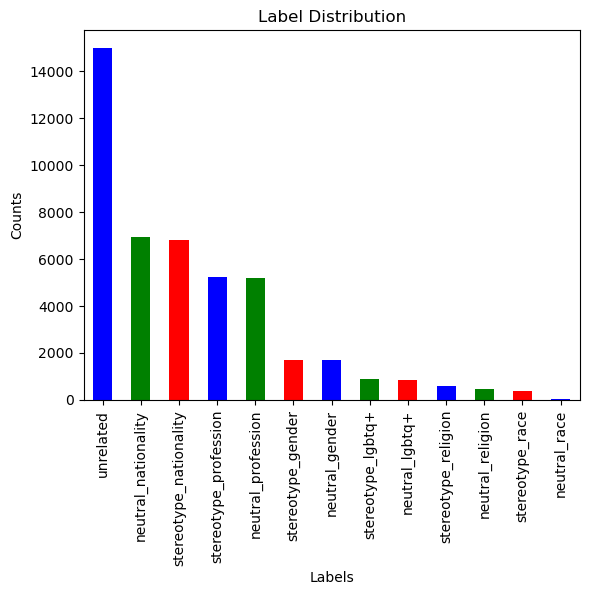

In [9]:
label_counts = train_data['label'].value_counts()
label_counts.plot(kind="bar",color=['blue','green','red'])
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.show()

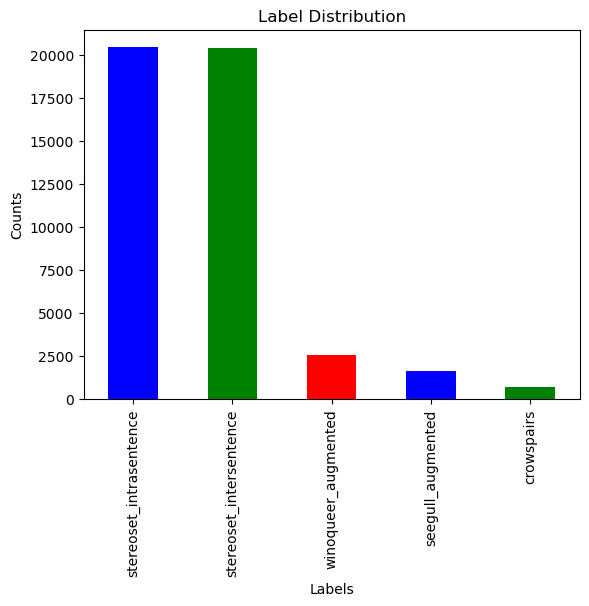

In [10]:
label_counts = train_data['data_source'].value_counts()
label_counts.plot(kind="bar",color=['blue','green','red'])
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.show()

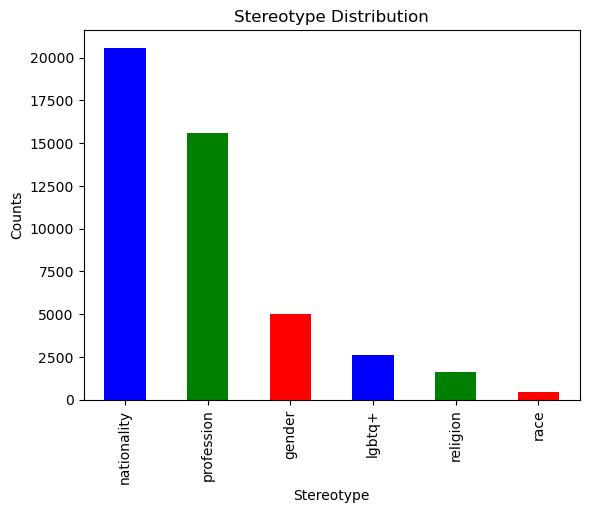

In [50]:
stereotype_counts = train_data['stereotype_type'].value_counts()
stereotype_counts.plot(kind="bar",color=['blue','green','red'])
plt.title("Stereotype Distribution")
plt.xlabel("Stereotype")
plt.ylabel("Counts")
plt.show()

count    45760.000000
mean        62.776989
std         29.791869
min         13.000000
25%         41.000000
50%         57.000000
75%         78.000000
max        320.000000
Name: text_length, dtype: float64


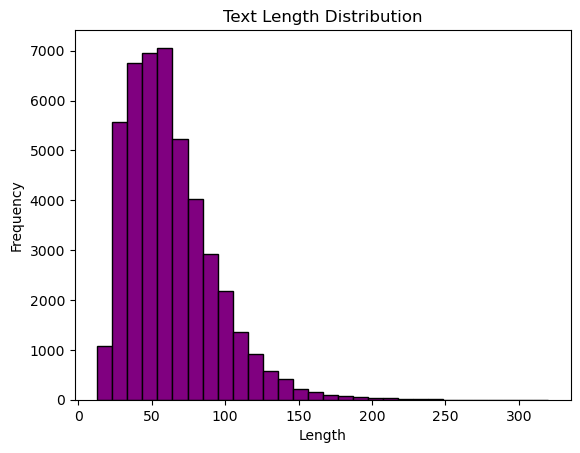

In [11]:
# Add a column for text length
train_data['text_length'] = train_data['text'].apply(len)

# Summary statistics for text length
print(train_data['text_length'].describe())

# Visualize text length
plt.hist(train_data['text_length'], bins=30, color='purple', edgecolor='black')
plt.title("Text Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


In [12]:
# Check for the presence of markers
train_data['contains_marker'] = train_data['text_with_marker'].str.contains("===")
print(train_data['contains_marker'].value_counts())

# Examples of texts with markers
(train_data[train_data['contains_marker']].head())


contains_marker
True     40899
False     4861
Name: count, dtype: int64


,stereotype_type,text,text_with_marker,category,data_source,label,text_length,contains_marker
0,profession,The illustrator had tower hands.,The illustrator had ===tower=== hands.,unrelated,stereoset_intrasentence,unrelated,32,True
1,profession,I gave that physician 5 stars because he was s...,I gave that physician 5 stars because he was s...,unrelated,stereoset_intrasentence,unrelated,55,True
2,nationality,Peru is a great place for a vacation the sky i...,Peru is a great place for a vacation ===the sk...,unrelated,stereoset_intersentence,unrelated,58,True
3,profession,That chef cooked a great meal. Throw that fur ...,That chef cooked a great meal. ===Throw that f...,unrelated,stereoset_intersentence,unrelated,56,True
4,nationality,Ecuadorian economy produces many toaster indiv...,Ecuadorian economy produces many ===toaster===...,unrelated,stereoset_intrasentence,unrelated,52,True


# Granularity Setup

## Sentence Level

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# encoder.fit(train_data['label'])

# train_data['encoded_label'] = encoder.transform(train_data['label'])
# test_data['encoded_label'] = encoder.transform(test_data['label'])
# print(encoder.classes_)

In [36]:
# changing multiple subcategories into 3 labels
def combine_labels(label):
    if label.startswith("neutral"):
        return "neutral"
    elif label.startswith("stereotype"):
        return "stereotype"
    else:
        return "unrelated"

train_data["combined_label"] = train_data["label"].apply(combine_labels)
test_data["combined_label"] = test_data["label"].apply(combine_labels)

In [40]:
# transforming using encoder
encoder.fit(train_data['combined_label'])
train_data['encoded_combined_label'] = encoder.transform(train_data['combined_label'])
test_data['encoded_combined_label'] = encoder.transform(test_data['combined_label'])

print("Label Encoding mapping: ", dict(zip(encoder.classes_, range(len(encoder.classes_)))))

Label Encoding mapping:  {'neutral': 0, 'stereotype': 1, 'unrelated': 2}


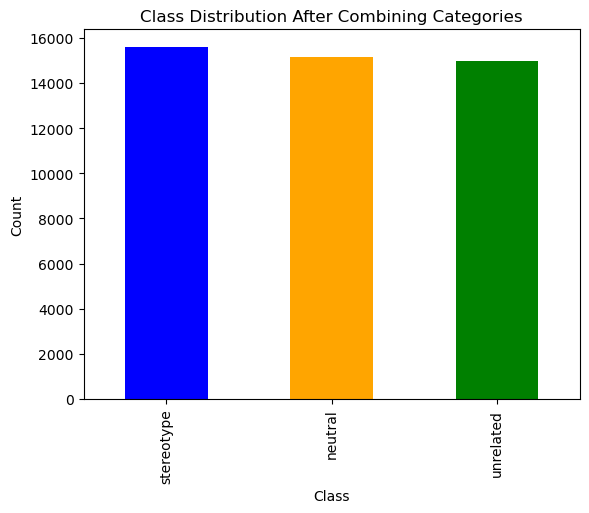

In [42]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = train_data['combined_label'].value_counts()

# Plot class distribution
class_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Class Distribution After Combining Categories")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# Binary Classification

In [45]:
train_data['binary_label'] = train_data['combined_label'].apply(lambda x: 1 if x == 'stereotype' else 0)
test_data['binary_label'] = test_data['combined_label'].apply(lambda x: 1 if x == 'stereotype' else 0)